# <span style="color:#bcff8f"> Week 5 Assignment</span>

<span style="font-size:12pt;color:gray;font-weight:bold"> Patrick Weatherford</span><br>

<span style="font-size:16pt">Modeling Distributinos</span>

***
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

***

<br>

<br>
Setting working directory to ThinkStats2 directory

In [1]:
import os

# changing working directory to ThinkStats2/code folder
path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 530 - Data Exploration and Analysis\\ThinkStats2\\code'
os.chdir(path)

<br>

Importing libraries

In [69]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import analytic
import thinkstats2
import thinkplot
import density
import hinc


<br>

***

## <span style="color:#c58fff">Exercise 5-1</span>

**Exercise:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [8]:
import scipy.stats

<br>

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [9]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

<br>

A "frozen random variable" can compute its mean and standard deviation.

In [10]:
dist.mean(), dist.std()

(178.0, 7.7)

<br>

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [30]:
dist.cdf(mu-sigma)

0.1586552539314574

<br>

How many people are between 5'10" and 6'1"? Also show mean and median of distribution.

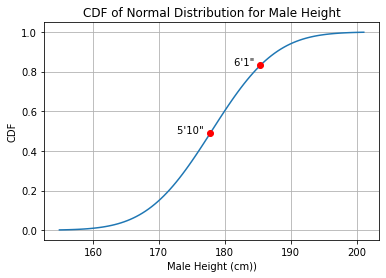

People between 5'10" and 6'1": 34.27%


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


def ft_inch_2_cm(feet=0, inches=0):
    feet_2_inch = feet*12
    total_inches = feet_2_inch + inches
    total_cm = total_inches*2.54
    return total_cm

mu = 178
sigma = 7.7

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.cdf(x, mu, sigma))
plt.xlabel("Male Height (cm))")
plt.ylabel("CDF")
plt.title("CDF of Normal Distribution for Male Height")
plt.grid(True)


dist = scipy.stats.norm(loc=mu, scale=sigma)

lower_bound = ft_inch_2_cm(feet=5, inches=10)
upper_bound = ft_inch_2_cm(feet=6, inches=1)


plt.plot(lower_bound, dist.cdf(lower_bound), marker='o', color='red')
plt.plot(upper_bound, dist.cdf(upper_bound), marker='o', color='red')
plt.text(lower_bound, dist.cdf(lower_bound), '5\'10"  ', horizontalalignment='right')
plt.text(upper_bound, dist.cdf(upper_bound), '6\'1"  ', horizontalalignment='right')

plt.show()


print(f'People between 5\'10" and 6\'1": {round(100*(dist.cdf(upper_bound) - dist.cdf(lower_bound)), 2)}%')

<br>

***

## <span style="color:#c58fff">Exercise 5-2</span>

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

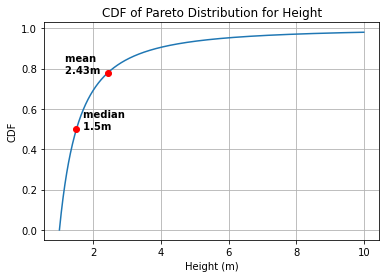

Median: 1.5m
Mean: 2.43m


In [94]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

def cm_2_m(cm):
    m = cm/100
    return m
    

alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)


x = np.linspace(start=xmin, stop=10, num=1000)
y = stats.pareto.cdf(x, scale=xmin, b=alpha)

plt.plot(x, y)
plt.grid(True)
plt.title("CDF of Pareto Distribution for Height")
plt.xlabel("Height (m)")
plt.ylabel("CDF")
plt.plot(dist.median(), stats.pareto.cdf(dist.median(), b=alpha, scale=xmin), marker='o', color='red')
plt.text(dist.median(), stats.pareto.cdf(dist.median(), b=alpha, scale=xmin), f'  median\n  {round(dist.median(), 2)}m', multialignment='left', horizontalalignment='left', fontweight='bold')
plt.plot(dist.mean(), stats.pareto.cdf(dist.mean(), b=alpha, scale=xmin), marker='o', color='red')
plt.text(dist.mean(), stats.pareto.cdf(dist.mean(), b=alpha, scale=xmin), f'mean  \n{round(dist.mean(), 2)}m  ', multialignment='left', horizontalalignment='right', fontweight='bold')
plt.show()

print(f"Median: {round(dist.median(),2)}m\nMean: {round(dist.mean(),2)}m")



<br>

What fraction of people are shorter than the mean?

In [92]:
stats.pareto.cdf(dist.mean(), b=alpha)

0.778739697565288

<br>

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [112]:
height_meter = 1
height_km = height_meter*1000

probability = stats.pareto.sf(height_km, b=alpha)
pop_size = 7000000000

print(f'''Probability taller than 1km: {probability:.20f}
Expected total taller than 1km: {round(pop_size * probability)}''')


Probability taller than 1km: 0.00000794328234724282
Expected total taller than 1km: 55603


<br>

How tall do we expect the tallest person to be?

In [120]:
path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 530 - Data Exploration and Analysis\\Assignments\\Week 5'
os.chdir(path)

Infinity meters tall!!!!

<img src="Chuck Norris Height - Pareto.jpg">

<br>

***

## <span style="color:#c58fff">Exercise 6-1</span>

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

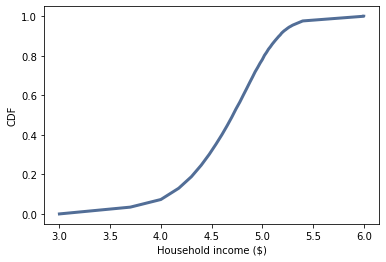


    Raw Moment 1 (mean): 74278.70753118733
    Median: 51226.45447894046
    Central Moment 2 (variance): 8826025649.562702
    Standardized Central Moment 3 (skew): 4.949920244429583
    Pearson's Skewness: 0.7361258019141782
    66.0005879566872
    


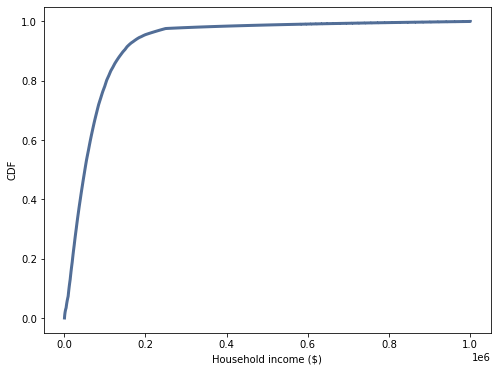

In [75]:
import warnings
import math

warnings.filterwarnings("ignore")

def RawMoment(xs, k):
    """Computes the kth raw moment of xs.
    """
    return sum(x**k for x in xs) / len(xs)


def CentralMoment(xs, k):
    """Computes the kth central moment of xs.
    """
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)


def StandardizedMoment(xs, k):
    """Computes the kth standardized moment of xs.
    """
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k


def Skewness(xs):
    """Computes skewness.
    """
    return StandardizedMoment(xs, 3)


def Median(xs):
    """Computes the median (50th percentile) of a sequence.

    xs: sequence or anything else that can initialize a Cdf

    returns: float
    """
    cdf = Cdf(xs)
    return cdf.Value(0.5)


def IQR(xs):
    """Computes the interquartile of a sequence.

    xs: sequence or anything else that can initialize a Cdf

    returns: pair of floats
    """
    cdf = Cdf(xs)
    return cdf.Value(0.25), cdf.Value(0.75)


def PearsonMedianSkewness(xs, median):
    """Computes the Pearson median skewness.
    """
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp


def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


def main():
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper=6.0)

    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='Household income ($)',
                   ylabel='CDF')
    
    sample = np.power(10, log_sample)
    
    cdf = thinkstats2.Cdf(sample)
    median = cdf.Value(0.5)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Household income ($)',
                   ylabel='CDF')
    
    print(f"""
    Raw Moment 1 (mean): {RawMoment(sample, 1)}
    Median: {cdf.Value(0.5)}
    Central Moment 2 (variance): {CentralMoment(sample, 2)}
    Standardized Central Moment 3 (skew): {StandardizedMoment(sample, 3)}
    Pearson's Skewness: {PearsonMedianSkewness(sample, median)}
    Fraction of people less than mean: {cdf.PercentileRank(RawMoment(sample, 1))}
    """)


if __name__ == "__main__":
    main()